In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import input_data
import tensorflow_datasets
#mnist = tensorflow_datasets.load('mnist')
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


In [2]:
print(mnist)

_Datasets(train=<input_data._DataSet object at 0x7fb1ceff67f0>, validation=<input_data._DataSet object at 0x7fb2545cf550>, test=<input_data._DataSet object at 0x7fb2545cf310>)


In [3]:
learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
example_to_show = 10

In [4]:
#layers of nn

num_hidden_1 = 256
num_hidden_2 = 128
num_input = 784



In [5]:
tf.compat.v1.disable_eager_execution()

X = tf.compat.v1.placeholder("float",[None,num_input])

weight = {
    "encoder_h1":tf.Variable(tf.compat.v1.random_normal([num_input,num_hidden_1])),
    "encoder_h2":tf.Variable(tf.compat.v1.random_normal([num_hidden_1,num_hidden_2])),
    "decoder_h1":tf.Variable(tf.compat.v1.random_normal([num_hidden_2,num_hidden_1])),
    "decoder_h2":tf.Variable(tf.compat.v1.random_normal([num_hidden_1,num_input])),
}

biases = {
    "encoder_b1":tf.Variable(tf.compat.v1.random_normal([num_hidden_1])),
    "encoder_b2":tf.Variable(tf.compat.v1.random_normal([num_hidden_2])),
    "decoder_b1":tf.Variable(tf.compat.v1.random_normal([num_hidden_1])),
    "decoder_b2":tf.Variable(tf.compat.v1.random_normal([num_input])),
}

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
def encoder(x):
    #enable hidden layers with sigmoid functions
    layer1 = tf.nn.sigmoid(tf.add(tf.matmul(x,weight['encoder_h1']),
                                 biases['encoder_b1'])),
    #second layer
    layer2 = tf.nn.sigmoid(tf.add(tf.matmul(layer1,weight['encoder_h2']),
                                 biases['encoder_b2']))
    return layer2

In [7]:
def decoder(x):
    # decoder hidden layer 1 with sigmod
    layer1 = tf.nn.sigmoid(tf.add(tf.matmul(x,weight['decoder_h1']),
                                 biases['decoder_b1'])),
    layer2 = tf.nn.sigmoid(tf.add(tf.matmul(layer1,weight['decoder_h2']),
                                 biases['decoder_b2']))
    return layer2

In [14]:
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)
print(X)
print(encoder_op.shape)
print(decoder_op.shape)

Tensor("Placeholder:0", shape=(None, 784), dtype=float32)
(1, None, 128)
(1, 1, None, 784)


In [9]:
prediction = decoder_op
y = X

In [10]:
loss = tf.reduce_mean(tf.pow(y-prediction,2))
optimizer = tf.compat.v1.train.RMSPropOptimizer(learning_rate).minimize(loss)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Trainig Auto Encoder

In [11]:
init = tf.compat.v1.global_variables_initializer()

sess = tf.compat.v1.Session()
sess.run(init)

for i in range(1,num_steps+1):
    #get next batch of amnist images
    batch_x,_ = mnist.train.next_batch(batch_size)
    
    #Run optimizer
    _,l = sess.run([optimizer,loss],feed_dict={X:batch_x})
    #display logs
    if i%display_step == 0 or i==1:
        print("Step {} : Minibatch Loss {}".format(i,l))

Step 1 : Minibatch Loss 0.4539388418197632
Step 1000 : Minibatch Loss 0.11911795288324356
Step 2000 : Minibatch Loss 0.09927895665168762
Step 3000 : Minibatch Loss 0.09033695608377457
Step 4000 : Minibatch Loss 0.08726781606674194
Step 5000 : Minibatch Loss 0.08432057499885559
Step 6000 : Minibatch Loss 0.08145834505558014
Step 7000 : Minibatch Loss 0.07726330310106277
Step 8000 : Minibatch Loss 0.07409311085939407
Step 9000 : Minibatch Loss 0.07421455532312393
Step 10000 : Minibatch Loss 0.07208044826984406
Step 11000 : Minibatch Loss 0.07156418263912201
Step 12000 : Minibatch Loss 0.06626859307289124
Step 13000 : Minibatch Loss 0.06425169110298157
Step 14000 : Minibatch Loss 0.06276002526283264
Step 15000 : Minibatch Loss 0.05968865752220154
Step 16000 : Minibatch Loss 0.05804036557674408
Step 17000 : Minibatch Loss 0.05440271273255348
Step 18000 : Minibatch Loss 0.053735002875328064
Step 19000 : Minibatch Loss 0.051770079880952835
Step 20000 : Minibatch Loss 0.05126068368554115
Step

Original Images


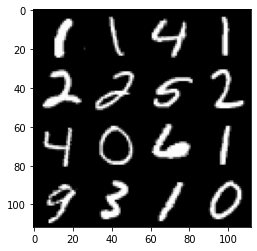

Reconstructed Images


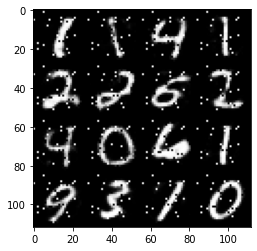

In [24]:
#testing
#encode and decode images from test set and visualize reconstructin
n=4
canvas_orig = np.empty((28*n,28*n))
canvas_recon = np.empty((28*n,28*n))

for i in range(n):
    #mnist set
    batch_x,_ = mnist.test.next_batch(n)
    g = sess.run(decoder_op,feed_dict={X:batch_x})
    #original image
    for j in range(n):
        canvas_orig[i*28:(i+1)*28,j*28:(j+1)*28] = batch_x[j].reshape([28,28])
    # reconstructed image
    for j in range(n):
        canvas_recon[i*28:(i+1)*28,j*28:(j+1)*28] = g[0][0][j].reshape([28,28])


print("Original Images")
plt.figure(figsize=(n,n))
plt.imshow(canvas_orig,origin="upper",cmap="gray")
plt.show()
             
print("Reconstructed Images")
plt.figure(figsize=(n,n))
plt.imshow(canvas_recon,origin="upper",cmap="gray")
plt.show()